In [14]:
import pandas as pd
import pickle
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_pickle('../../data/jenia_data/test/jenia_test_with_fixed_FFP_INS.pkl')

In [ ]:
with open('../../data/jenia_data/test/jenia_test_with_fixed_FFP_INS.pkl', 'rb') as file:
    data = pickle.load(file)

In [26]:
data_instance = data[data['pad_sen_id'] == '405248077_0012']

In [33]:
def generate_pred_10(pred_vector):
    return pred_vector + [1] if sum(pred_vector) == 0 else pred_vector + [0]
#df_comb['pred_10'] = df_comb[pred_col_j].apply(generate_pred_10)
data['labels_10'] = data['labels_9'].apply(generate_pred_10)

In [5]:
categories=['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'O']

cat_indices = {category: index for index, category in enumerate(categories)}

for cat, index in cat_indices.items():
    data[cat] = data['labels_10'].apply(lambda x: x[index])
    
only_adm = data[data['ADM'] == 1]
only_att = data[data['ATT'] == 1]
only_ber = data[data['BER'] == 1]
only_enr = data[data['ENR'] == 1]
only_etn = data[data['ETN'] == 1]
only_fac = data[data['FAC'] == 1]
only_ins = data[data['INS'] == 1]
only_mbw = data[data['MBW'] == 1]
only_stm = data[data['STM'] == 1]
only_o = data[data['O'] == 1]

## Category Distribution over combined test set (Jenia_test, Ellemijn_all, Sharona_all)

In [7]:
category_distribution = data[categories].sum()

In [8]:
category_distribution

ADM      5162
ATT       407
BER       616
ENR      1118
ETN      2604
FAC      2655
INS      1138
MBW       924
STM      3507
O      223198
dtype: int64

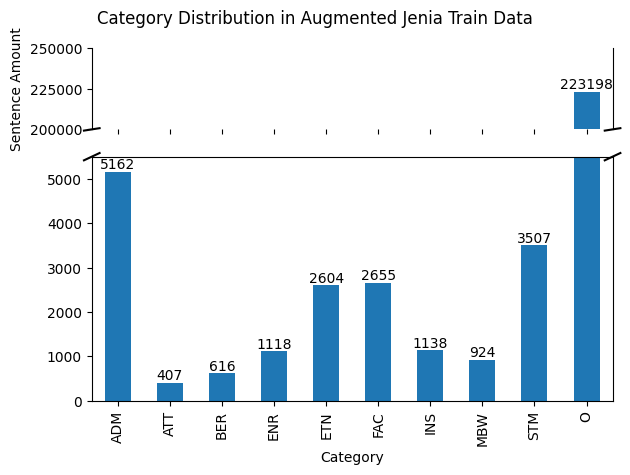

In [13]:
fig, (ax1, ax2) = plt. subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[1,3]})

category_distribution.plot(kind='bar', ax=ax1)
category_distribution.plot(kind='bar', ax=ax2)

ax1.set_ylim(200000, 250000)
ax2.set_ylim(0,5500)

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax1.xaxis.tick_bottom()

d= .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((1 - d, 1 + d), (1-d, 1+d), **kwargs)


fig.suptitle('Category Distribution in Augmented Jenia Train Data')
ax2.set_xlabel('Category')
ax1.set_ylabel('Sentence Amount')
ax1.set_ylabel('Sentence Amount')

for index, value in enumerate(category_distribution):
    if value < 6000:
        ax2.text(index, value, str(value), ha='center', va='bottom')
    else:
        ax1.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
    
plt.show()

## Category Pattern Distribution

In [ ]:
def get_category_pattern(row):
    return ', '.join(cat for cat, present in zip(categories, row['labels_10']) if present)

In [42]:
pd.set_option('display.max_rows', 500)

In [27]:
data['pattern'] = data.apply(get_category_pattern, axis=1)

pattern_dist = data['pattern'].value_counts()
pattern_percent =  data['pattern'].value_counts(normalize=True) * 100

pattern_summary = pd.DataFrame({'Count':pattern_dist, 'Percentage':pattern_percent})

latex_table = pattern_summary.to_latex()
print(latex_table)
pattern_summary

\begin{tabular}{lrr}
\toprule
{} &  Count &  Percentage \\
\midrule
O                  &  33769 &   90.400214 \\
ADM                &    966 &    2.585999 \\
ETN                &    571 &    1.528577 \\
STM                &    310 &    0.829876 \\
ENR                &    290 &    0.776335 \\
FAC                &    286 &    0.765627 \\
BER                &    270 &    0.722795 \\
MBW                &    265 &    0.709410 \\
INS                &    233 &    0.623745 \\
ATT                &     61 &    0.163298 \\
ETN, MBW           &     44 &    0.117789 \\
FAC, INS           &     35 &    0.093696 \\
ENR, INS           &     32 &    0.085665 \\
ADM, ENR           &     27 &    0.072279 \\
ADM, INS           &     18 &    0.048186 \\
BER, INS           &     15 &    0.040155 \\
BER, ENR           &     15 &    0.040155 \\
BER, STM           &     13 &    0.034801 \\
ENR, MBW           &     12 &    0.032124 \\
ADM, ETN           &     11 &    0.029447 \\
ADM, FAC, INS      &     10 &   

/tmp/ipykernel_6973/2026310465.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = pattern_summary.to_latex()


,Count,Percentage
O,33769,90.400214
ADM,966,2.585999
ETN,571,1.528577
STM,310,0.829876
ENR,290,0.776335
FAC,286,0.765627
BER,270,0.722795
MBW,265,0.709410
INS,233,0.623745
ATT,61,0.163298


In [ ]:
# new_combined['pattern'] = new_combined[categories].astype(str).agg('-'.join, axis=1)

# pattern_dist = new_combined['pattern'].value_counts()

# pattern_dist

## Batch Distribution

In [28]:
batch_dist = data['batch'].value_counts()

batch_dist

week_22-26                     6245
fysiotherapie                  4036
week_16                        2430
week_17                        2169
week_14                        2155
ergotherapie                   2054
week_19                        1948
dietetiek                      1860
lung_patient_batch3            1674
gastro_patients                1579
week_18                        1575
gastro_patients_batch2         1372
gastro_patients_small_batch    1368
week_15                        1202
week_21                        1175
lung_patients                  1047
week_22                        1004
week_20                         784
ze_batch2                       711
ze_batch1                       517
lung_patients_batch2            283
ze_batch3                       167
Name: batch, dtype: int64

## Source dataset distribution

In [85]:
source_dist = data['source_dataset'].value_counts()

source_dist

source_dataset
jenia_test    22082
ellemijn       7950
sharona        7323
Name: count, dtype: int64

## Category Pattern Distribution per Batch

In [29]:
pattern_per_batch = data.groupby('source_dataset')['pattern'].value_counts()

pattern_per_batch

source_dataset  pattern      
ellemijn        O                7351
                BER               144
                ENR               140
                INS                77
                STM                42
                                 ... 
sharona         ENR, ETN            2
                ETN, INS            2
                INS, MBW            2
                ADM, ENR, MBW       1
                ENR, STM            1
Name: pattern, Length: 109, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 500)

## Category Distribution per Batch

In [38]:

category_dist_per_batch = new_combined.groupby('batch')[categories].sum()

category_dist_per_batch

NameError: name 'new_combined' is not defined

In [39]:
categories_9=['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM']

cat_dist_per_source = data.groupby('source_dataset')[categories_9].sum()
cat_dist_per_source

,ADM,ATT,BER,ENR,ETN,FAC,INS,MBW,STM
source_dataset,,,,,,,,,
ellemijn,56,33,181,180,26,18,116,33,49
jenia_test,891,39,110,165,414,281,165,147,210
sharona,116,10,40,68,200,63,101,161,89


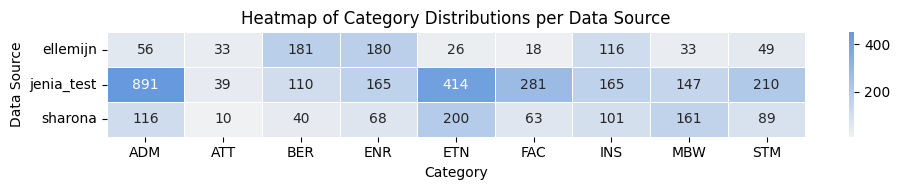

In [55]:
palette= sns.light_palette("#69d", as_cmap=True)
plt.figure(figsize=(10,2))
sns.heatmap(cat_dist_per_source, annot=True, fmt="d", cmap=palette, linewidths=.7, vmax=450)
plt.title('Heatmap of Category Distributions per Data Source')
plt.xlabel('Category')
plt.ylabel('Data Source')
plt.tight_layout()
plt.show()